## Unsupervised learning (10 points)

### Colleges (4 points)

#### 1. Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.

In [1358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df = pd.read_csv("data/College.csv")

In [1359]:
df["Private"].replace(to_replace="Yes", value="Private", inplace=True)
df["Private"].replace(to_replace="No", value="Non-Private", inplace=True)

In [1360]:
#Select Columns (Variables) on which to run PCA. "Private" variable, which is categorical is excluded.
X = df.loc[:, 'Apps':'Grad.Rate'].values
#X_std = StandardScaler().fit_transform(X)
y = df.loc[:, 'Private'].values

In [1361]:
pca = PCA() # All PCA components
X_r = pca.fit(X).transform(X) # For unscaled version
#X_r = pca.fit(X_std).transform(X_std)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_.T)


Eigenvalues 
[  4.30379378e+07   3.78056325e+07   6.24492891e+06   2.91852679e+06
   1.44214814e+06   6.21395725e+05   3.72541141e+05   3.27117832e+05
   3.92815684e+04   2.53168644e+04   4.26204091e+02   2.09555511e+02
   1.57391024e+02   8.08957234e+01   3.59829140e+01   2.69844159e+01
   8.43828081e+00]
Eigenvectors 
[[  5.57026265e-01  -3.93606986e-02  -1.67353250e-01   6.64271177e-01
    1.64686863e-01   5.80500092e-02   1.34342602e-01   4.11793520e-01
   -2.74068846e-02  -3.76034135e-03   4.38857450e-03  -3.02180551e-03
   -5.30739374e-04   4.00796357e-04   5.88553549e-04   1.12791915e-03
   -1.86846892e-04]
 [  3.47711968e-01  -7.71620231e-02  -1.62363494e-01   2.32927268e-01
    5.80585150e-03   6.02807211e-02  -2.39957336e-01  -8.41806975e-01
    1.49989709e-01   5.82362196e-03  -8.23337143e-03   5.36725416e-03
    1.75963534e-03   1.07556459e-03  -1.25067011e-03  -2.47359512e-03
    2.32571906e-04]
 [  1.29854039e-01  -4.54128642e-02  -9.66343352e-03  -5.88323506e-02
   -6.4

According to "Kaiser" criterion, all components should be retained, because their Eigenvalues are greater or equal to 1.

In [1362]:
target_names = df["Private"].unique()
target_names

array(['Private', 'Non-Private'], dtype=object)

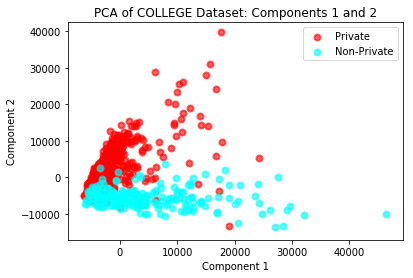

In [1363]:
def pca_scatter(pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan']
    lw = 2

    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, pca1], X_r[y == target_name, pca2], color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of COLLEGE Dataset: Components {} and {}'.format(pca1+1, pca2+1))
    plt.xlabel('Component {}'.format(pca1+1))
    plt.ylabel('Component {}'.format(pca2+1))
    plt.show()
    
pca_scatter(0, 1)

In [1364]:
# Generate component and variable names:
list_component_names = []
for i in range(1, 18):
    list_component_names.append("Component " + str(i))
list_component_names

list_variable_names = df.columns[1:].tolist()

In [1365]:
#Component Loadings
def loadings():
    loadings = pca.components_.T
    results = pd.DataFrame(loadings)
    results.columns = list_component_names
    results.index = list_variable_names
    return results

loadings = loadings()
print(loadings)

             Component 1  Component 2  Component 3  Component 4  Component 5  \
Apps            0.557026    -0.039361    -0.167353     0.664271     0.164687   
Accept          0.347712    -0.077162    -0.162363     0.232927     0.005806   
Enroll          0.129854    -0.045413    -0.009663    -0.058832    -0.064077   
Top10perc       0.001025     0.001706    -0.000131     0.000123    -0.001797   
Top25perc       0.001177     0.001497    -0.000773    -0.000182    -0.001910   
F.Undergrad     0.670614    -0.283672     0.024672    -0.584959    -0.281437   
P.Undergrad     0.111113    -0.080380     0.066142    -0.302818     0.923535   
Outstate        0.054842     0.569323    -0.758610    -0.253931    -0.007019   
Room.Board      0.028866     0.105991    -0.136601     0.010456     0.178168   
Books           0.003734     0.001429     0.002740    -0.000882     0.006591   
Personal        0.023132    -0.029838     0.060305    -0.049733     0.066304   
PhD             0.001139     0.000873   

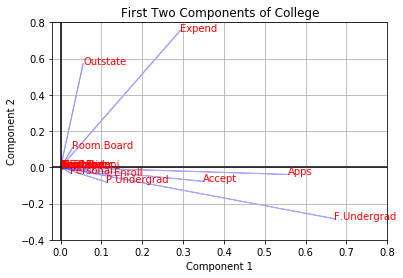

In [1366]:
# Graph first two components:
first_two_pca = loadings[["Component 1", "Component 2"]]

xmin = -.02
xmax = .8
ymin = -.4
ymax = .8

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')
plt.grid()
for row_index in range(len(first_two_pca)):
    x = first_two_pca.iloc[row_index].values[0]
    y = first_two_pca.iloc[row_index].values[1]
    arrow_label = first_two_pca.iloc[row_index].name
    # Plot arrows:
    plt.arrow(0, 0, x, y, alpha=0.3, color="blue")
    # Plot arrow labels:
    plt.text(x, y, arrow_label, color="r")
    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of College")

# Display:
plt.show()

Based on the biplot above, it is hard to interpret what the prinicipal components may be... One may suppose Component 1 has something to do with Undergraduate Enrollment (?). Component 2 on the other hand... not sure. 


##### What variables appear strongly correlated on the first principal component?

The following variables seem correlated on the first PC (>.3): 
'Accept', 'Apps', 'F.Undergrad'

##### What about the second principal component?

The following variables seem correlated on the second PC (>.5): 
'Outstate', 'Expend'

#### 2. Calculate the cumulative proportion of variance explained by all the principal components (see 10.2.3 in ISLR). Approximately how much of the variance in College is explained by the first two principal components?

In [1367]:
# Cumulative proportion of variance explained by all the principal components:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5))

array([ 0.46359,  0.87082,  0.93809,  0.96953,  0.98506,  0.99175,
        0.99576,  0.99928,  0.9997 ,  0.99997,  0.99997,  0.99997,
        0.99997,  0.99997,  0.99997,  0.99997,  0.99997])

=> about 87% of the variance is explained by the first two principal components.

### Clustering states (6 points)

#### 1. Perform PCA on the dataset and plot the observations on the first and second principal components.

In [1368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("data/USArrests.csv")
raw_df = pd.read_csv("data/USArrests.csv", index_col=0)

In [1369]:
#Select Columns (Variables) on which to run PCA. "Private" variable, which is categorical is excluded.
X = df.loc[:, 'Murder':'Rape'].values
X_std = StandardScaler().fit_transform(X) # For scaled version

pca = PCA() # All PCA components
X_r = pca.fit(X).transform(X) # For unscaled version
#X_r = pca.fit(X_std).transform(X_std)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_.T)


Eigenvalues 
[  7.01111485e+03   2.01992366e+02   4.21126508e+01   6.16424618e+00]
Eigenvectors 
[[ 0.04170432  0.04482166  0.07989066  0.99492173]
 [ 0.99522128  0.05876003 -0.06756974 -0.0389383 ]
 [ 0.04633575 -0.97685748 -0.20054629  0.05816914]
 [ 0.0751555  -0.20071807  0.97408059 -0.07232502]]


In [1370]:
# Generate component and variable names:
list_component_names = []
for i in range(1, 5):
    list_component_names.append("Component " + str(i))

list_variable_names = df.columns[1:].tolist()

In [1371]:
#Component Loadings
def loadings():
    loadings = pca.components_.T
    results = pd.DataFrame(loadings)
    results.columns = list_component_names
    results.index = list_variable_names
    return results

loadings = loadings()
print(loadings)

          Component 1  Component 2  Component 3  Component 4
Murder       0.041704     0.044822     0.079891     0.994922
Assault      0.995221     0.058760    -0.067570    -0.038938
UrbanPop     0.046336    -0.976857    -0.200546     0.058169
Rape         0.075156    -0.200718     0.974081    -0.072325


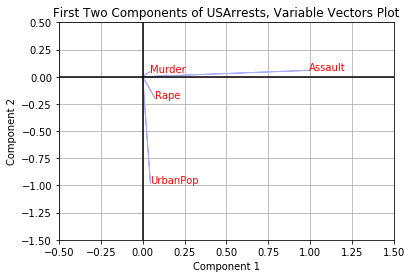

In [1372]:
# Graph first two components:
first_two_pca = loadings[["Component 1", "Component 2"]]

xmin = -.5
xmax = 1.5
ymin = -1.5
ymax = .5
plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')

# Plot PC vectors:
for row_index in range(len(first_two_pca)):
    x = first_two_pca.iloc[row_index].values[0]
    y = first_two_pca.iloc[row_index].values[1]
    arrow_label = first_two_pca.iloc[row_index].name
    # Plot arrows:
    plt.arrow(0, 0, x, y, alpha=0.3, color="blue")
    # Plot arrow labels:
    plt.text(x, y, arrow_label, color="r")


# Plot observations:
observation_df = pd.DataFrame(X_r, index=df.loc[:, 'State'].values, columns=list_component_names)
observation_df = observation_df[["Component 1", "Component 2"]]

# Plot points:
'''plt.scatter(x=observation_df["Component 1"], y=observation_df["Component 2"], 
            c='blue', alpha=.5)'''

# Plot text labels:
'''for row_index in range(len(observation_df)):
    x = observation_df.iloc[row_index].values[0]
    y = observation_df.iloc[row_index].values[1]
    point_label = observation_df.iloc[row_index].name
    plt.text(x, y, point_label)'''

    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of USArrests, Variable Vectors Plot")

# Display:
plt.show()

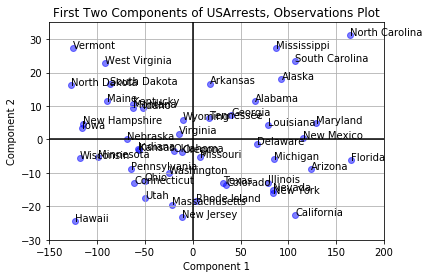

In [1373]:
xmin = -150
xmax = 200
ymin = -30
ymax = 35
plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')

# Plot observations:
observation_df = pd.DataFrame(X_r, index=df.loc[:, 'State'].values, columns=list_component_names)
observation_df = observation_df[["Component 1", "Component 2"]]

# Plot points:
plt.scatter(x=observation_df["Component 1"], y=observation_df["Component 2"], 
            c='blue', alpha=.5)

# Plot text labels:
for row_index in range(len(observation_df)):
    x = observation_df.iloc[row_index].values[0]
    y = observation_df.iloc[row_index].values[1]
    point_label = observation_df.iloc[row_index].name
    plt.text(x, y, point_label)

    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of USArrests, Observations Plot")

# Display:
plt.show()

#### 2. Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

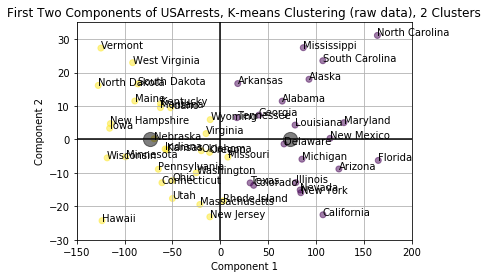

In [1374]:
xmin = -150
xmax = 200
ymin = -30
ymax = 35
plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')

# Plot observations:
observation_df = pd.DataFrame(X_r, index=df.loc[:, 'State'].values, columns=list_component_names)
observation_df = observation_df[["Component 1", "Component 2"]]
# Set-up for k-means:
kmeans = KMeans(n_clusters=2)
kmeans.fit(raw_df)
y_kmeans = kmeans.predict(raw_df)

# Plot points and Centroids:
plt.scatter(x=observation_df["Component 1"], y=observation_df["Component 2"], 
            c=y_kmeans, alpha=.5)
centers = pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Plot text labels:
for row_index in range(len(observation_df)):
    x = observation_df.iloc[row_index].values[0]
    y = observation_df.iloc[row_index].values[1]
    point_label = observation_df.iloc[row_index].name
    plt.text(x, y, point_label)

    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of USArrests, K-means Clustering (raw data), 2 Clusters")

# Display:
plt.show()

#### 3. Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

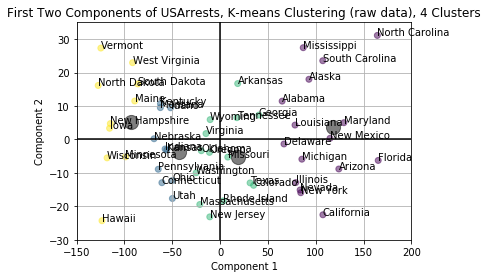

In [1375]:
xmin = -150
xmax = 200
ymin = -30
ymax = 35
plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')

# Plot observations:
observation_df = pd.DataFrame(X_r, index=df.loc[:, 'State'].values, columns=list_component_names)
observation_df = observation_df[["Component 1", "Component 2"]]
# Set-up for k-means:
kmeans = KMeans(n_clusters=4)
kmeans.fit(raw_df)
y_kmeans = kmeans.predict(raw_df)

# Plot points and Centroids:
plt.scatter(x=observation_df["Component 1"], y=observation_df["Component 2"], 
            c=y_kmeans, alpha=.5)
centers = pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Plot text labels:
for row_index in range(len(observation_df)):
    x = observation_df.iloc[row_index].values[0]
    y = observation_df.iloc[row_index].values[1]
    point_label = observation_df.iloc[row_index].name
    plt.text(x, y, point_label)

    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of USArrests, K-means Clustering (raw data), 4 Clusters")

# Display:
plt.show()

#### 4. Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

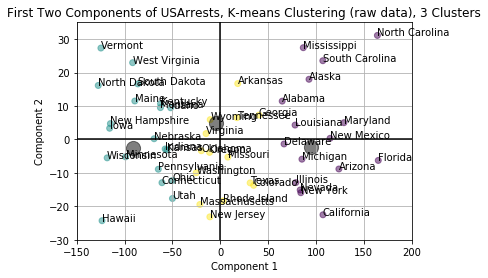

In [1376]:
xmin = -150
xmax = 200
ymin = -30
ymax = 35
plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')

# Plot observations:
observation_df = pd.DataFrame(X_r, index=df.loc[:, 'State'].values, columns=list_component_names)
observation_df = observation_df[["Component 1", "Component 2"]]
# Set-up for k-means:
kmeans = KMeans(n_clusters=3)
kmeans.fit(raw_df)
y_kmeans = kmeans.predict(raw_df)

# Plot points and Centroids:
plt.scatter(x=observation_df["Component 1"], y=observation_df["Component 2"], 
            c=y_kmeans, alpha=.5)
centers = pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Plot text labels:
for row_index in range(len(observation_df)):
    x = observation_df.iloc[row_index].values[0]
    y = observation_df.iloc[row_index].values[1]
    point_label = observation_df.iloc[row_index].name
    plt.text(x, y, point_label)

    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of USArrests, K-means Clustering (raw data), 3 Clusters")

# Display:
plt.show()

##### Describing results for Tasks 2, 3, and 4:

In all three cases, observations separate into clusters mainly along Component 1. This is not surprising, because distance units along this x-axis are larger than along Component 2 y-axis.

If Component 1 is interpreted as a measure of overall rates of serious crimes, then these three K-means cases may indicate clustering into groups of states with various degrees of crime rates based on the correspondin x-axis value (higher value is higher crime rates). So for Task 2, this clustering may be into two groups "Low" (Yellow) and "High" (Purple) crime rates, since the corrsponding centroids vary along x-axis values. For Task 3, the crime rate clusters are in the ascending order: Yellow to Blue to Green to Purple, with each group corresponding to a higher crime rate. Similarly, for Task 4, the groups cluster into three crime-rate groups. A cursory look at the underlying .csv data seems to confirm this interpretation. 

#### 5. Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.

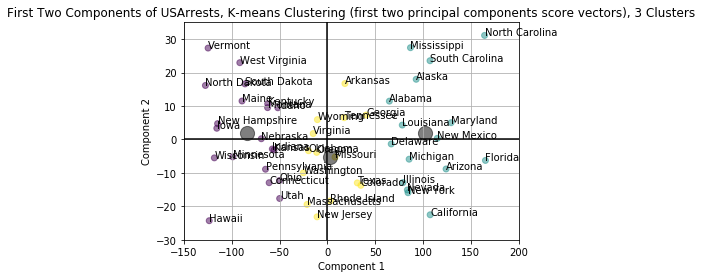

In [1377]:
# Graph first two components:
first_two_pca = loadings[["Component 1", "Component 2"]]

xmin = -150
xmax = 200
ymin = -30
ymax = 35
plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.hlines(0, xmin, xmax, linestyles='-', colors='black')
plt.vlines(0, ymin, ymax, linestyles='-', colors='black')

# Plot observations:

observation_df = pd.DataFrame(X_r, index=df.loc[:, 'State'].values, columns=list_component_names)
observation_df = observation_df[["Component 1", "Component 2"]]

# Set-up for k-means:
kmeans = KMeans(n_clusters=3)
kmeans.fit(observation_df)
y_kmeans = kmeans.predict(observation_df)

# Plot points and Centroids:
plt.scatter(x=observation_df["Component 1"], y=observation_df["Component 2"], 
            c=y_kmeans, alpha=.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Plot text labels:
for row_index in range(len(observation_df)):
    x = observation_df.iloc[row_index].values[0]
    y = observation_df.iloc[row_index].values[1]
    point_label = observation_df.iloc[row_index].name
    plt.text(x, y, point_label)

    
# Axis and Title Labels:
label_component_one = first_two_pca.columns.values[0]
label_component_two = first_two_pca.columns.values[1]
plt.xlabel(label_component_one)
plt.ylabel(label_component_two)
plt.title("First Two Components of USArrests, K-means Clustering (first two principal components score vectors), 3 Clusters")

# Display:
plt.show()

Observations seem to cluster into the same groups compared to the Task 4. The only apperent difference is the change centroid coordinates for the Purple group. This change is mainly along y-axis, corresponding to Component 2. Visually, it seems that clustering on the first two principal components brings the centroid location closer to what one would expect by visual expecation than what we see based on the raw data. 

#### 6. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

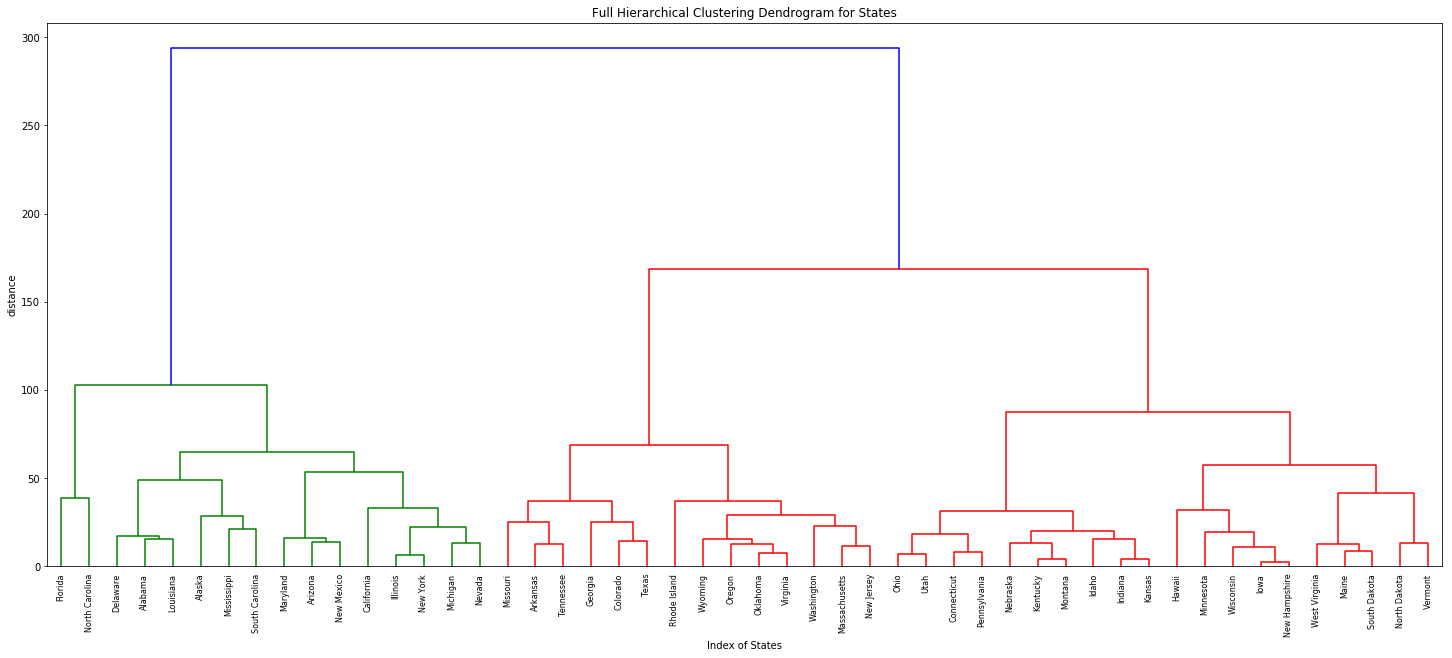

In [1378]:
# Citation: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

# Perform hierarchical clustering with complete linkage and Euclidean distance:
Z = linkage(raw_df, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Full Hierarchical Clustering Dendrogram for States')
plt.xlabel('Index of States')
plt.ylabel('distance')
state_labels = raw_df.index
dendogram_full = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=state_labels)
plt.show()

#### 7. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

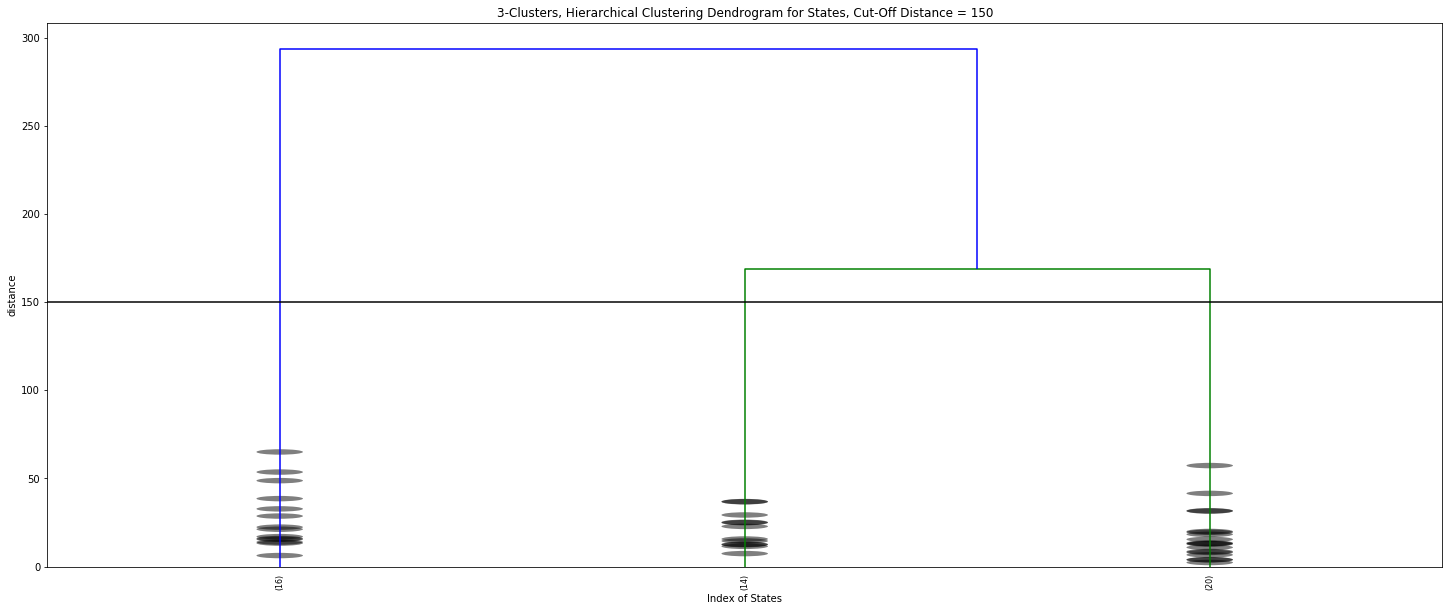

In [1379]:
# Citation: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

# Perform hierarchical clustering with complete linkage and Euclidean distance:
Z = linkage(raw_df, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('3-Clusters, Hierarchical Clustering Dendrogram for States, Cut-Off Distance = 150')
plt.xlabel('Index of States')
plt.ylabel('distance')
plt.axhline(y=150, c='k')
state_labels = raw_df.index
dendogram_cut_off = dendrogram(
    Z,
    truncate_mode='lastp',
    p=3,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=state_labels,
    show_contracted=True
    )
plt.show()

In [1380]:
intervals = []
beginning = 0
end = 0
for item in dendogram_cut_off['ivl']:
    string_clean = item.strip('(')
    string_clean = string_clean.strip(')')
    end += int(string_clean)
    tuple_to_append = (beginning, end)
    beginning = end
    intervals.append(tuple_to_append)

cluster_number = 1
for interval in intervals:
    print("Cluster {} states:".format(cluster_number))
    cluster_number += 1
    start, end = interval
    list_of_states_in_cluster = sorted(dendogram_full['ivl'][start:end])
    for state in list_of_states_in_cluster:
        print(state)
    print()

Cluster 1 states:
Alabama
Alaska
Arizona
California
Delaware
Florida
Illinois
Louisiana
Maryland
Michigan
Mississippi
Nevada
New Mexico
New York
North Carolina
South Carolina

Cluster 2 states:
Arkansas
Colorado
Georgia
Massachusetts
Missouri
New Jersey
Oklahoma
Oregon
Rhode Island
Tennessee
Texas
Virginia
Washington
Wyoming

Cluster 3 states:
Connecticut
Hawaii
Idaho
Indiana
Iowa
Kansas
Kentucky
Maine
Minnesota
Montana
Nebraska
New Hampshire
North Dakota
Ohio
Pennsylvania
South Dakota
Utah
Vermont
West Virginia
Wisconsin



#### 8. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

In [1381]:
# Scale the variables to have standard deviation 1:
scaled_df = scale(raw_df)

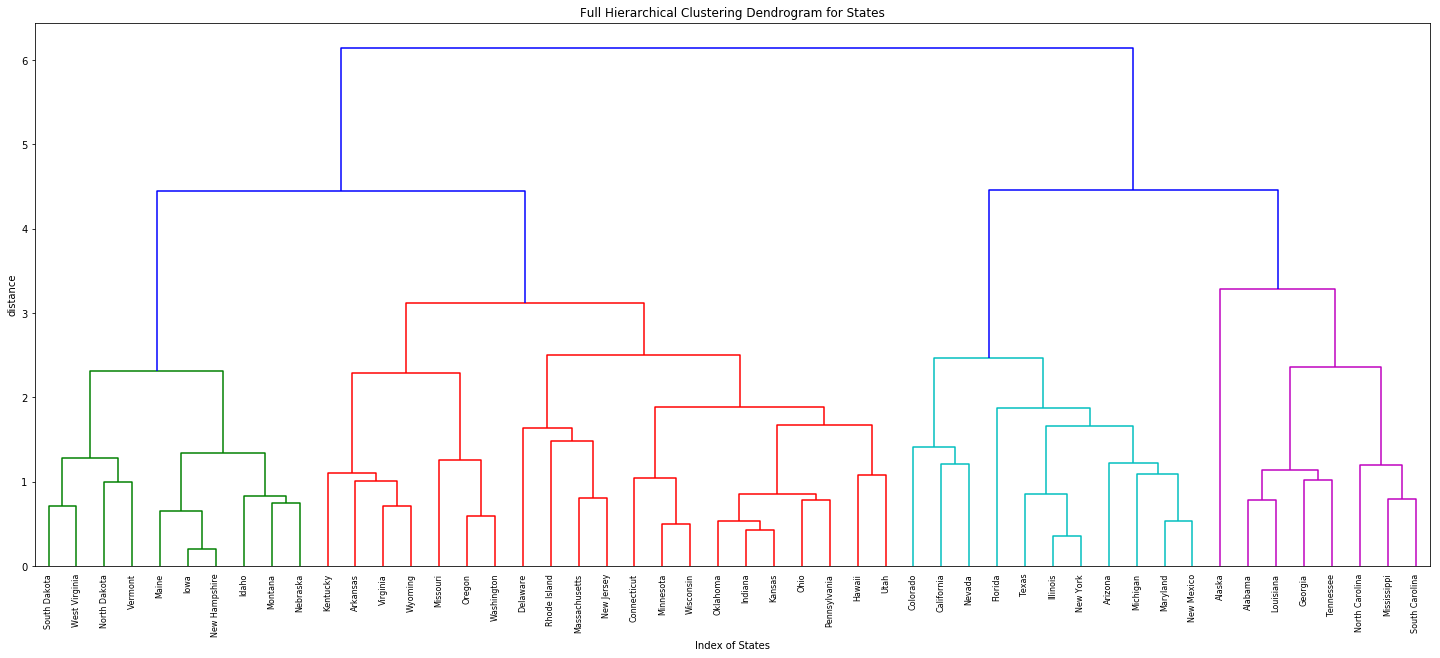

In [1382]:
# Hierarchically cluster the states using complete linkage and Euclidean distance:
Z = linkage(scaled_df, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Full Hierarchical Clustering Dendrogram for States')
plt.xlabel('Index of States')
plt.ylabel('distance')
state_labels = raw_df.index
dendogram_full = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=state_labels)
plt.show()

=> Scaling the variables gives each variable a more equal importance in performing hierarchical clustering, so the dendogram displays observations (states) more evenly distributed across different cluster; the tree is more "balanced."